In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from scipy import stats
from pyreadstat import read_sav, set_value_labels
import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
sns.set_theme()

In [19]:
data, meta = read_sav("r29i_os_42.sav")

In [38]:
select_columns = [
    "yj10",     # wage
    "yj1.1.1",  # job satisfaction
    "yj4.1",    # job 
    "y_diplom", # education
    "yj260",    # foreign language
    "ym80",     # alcohol consumption
    "y_age",    # age
    "yj161.3y", # job experience
    "psu",      # region of residence 
    "yj6",      # number of subordinates
    "yj6.1a",   # work time
    "yj401.1a", # OK user
    "yj401.2a", # VK user
    "yj401.3a", # FaceBook user 
    "yj401.5a", # Twitter user 
    "yh5",      # sex
]

In [39]:
# Рассмотрим только работающих людей (data["yj1"] == 1) и отфильтруем данные с пропусками 

df_w = data[
    (data["yj1"] == 1) 
    & (data["yj10"] < 99999996) 
    & (data["yj1.1.1"] < 99999996) 
    & (data["yj4.1"] < 99999996)
    & (data["y_diplom"] < 99999996)
    & (data["yj260"] < 99999996)
    & (data["ym80"] < 99999996)
    & (data["y_age"] < 99999996)
    & (data["yj161.3y"] < 99999996)
    & (data["yj6"] < 99999996)
    & (data["yj6.1a"] < 99999996)
    & (data["psu"] < 99999996)
    & (data["yj401.1a"] < 99999996)
    & (data["yj401.2a"] < 99999996)
    & (data["yj401.3a"] < 99999996)
    & (data["yj401.5a"] < 99999996)
    & (data["yh5"] < 99999996)
    ][select_columns]


for col in ["yj4.1", "y_diplom", "yj260", "ym80", "psu", "yh5", "yj401.1a", "yj401.2a", "yj401.3a", "yj401.5a"]:
    df_w[col] = pd.Categorical(df_w[col])

In [40]:
df_w

,yj10,yj1.1.1,yj4.1,y_diplom,yj260,ym80,y_age,yj161.3y,psu,yj6,yj6.1a,yj401.1a,yj401.2a,yj401.3a,yj401.5a,yh5
4,30000.0,3.0,7.0,4.0,2.0,2.0,52.0,32.0,6.0,2.0,8.0,2.0,1.0,2.0,2.0,2.0
11,90000.0,2.0,10.0,6.0,1.0,1.0,44.0,21.0,6.0,2.0,9.0,2.0,1.0,2.0,2.0,2.0
12,29500.0,4.0,17.0,4.0,2.0,1.0,57.0,40.0,6.0,2.0,24.0,2.0,1.0,1.0,2.0,2.0
13,38000.0,2.0,17.0,4.0,2.0,1.0,51.0,28.0,6.0,2.0,24.0,2.0,2.0,2.0,2.0,1.0
14,11000.0,2.0,6.0,3.0,2.0,1.0,39.0,15.0,6.0,2.0,12.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103,40000.0,2.0,28.0,6.0,2.0,2.0,27.0,2.0,3.0,2.0,12.0,1.0,1.0,1.0,1.0,2.0
12104,46000.0,1.0,13.0,6.0,2.0,1.0,26.0,6.0,3.0,2.0,24.0,2.0,1.0,2.0,2.0,2.0
12105,68000.0,2.0,13.0,6.0,1.0,1.0,48.0,28.0,3.0,1.0,8.0,2.0,1.0,2.0,2.0,2.0
12115,27000.0,2.0,11.0,6.0,2.0,1.0,59.0,36.0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0


In [49]:
d = {"yj10":   "wage",
    "yj1.1.1": "job_satisfaction",
    "y_diplom": "education",
    "yj4.1": "job",
    "yj260": "foreigin_lan",
    "ym80": "alc",
    "y_age": "age",
    "yj161.3y": "job_experience", 
    "yj6": "supervisor",
    "yj6.1a": "work_time",
    "yj401.1a": "ok",
    "yj401.2a": "vk",
    "yj401.3a": "facebook",
    "yj401.5a": "twitter",
    "yh5": "male"}

df_tmp = df_w.rename(columns = d)

In [50]:
df_tmp.describe()

,wage,job_satisfaction,age,job_experience,supervisor,work_time
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,33351.710235,2.171910,41.235711,18.191848,1.795747,9.564023
std,22628.953881,0.766456,11.067463,11.340748,0.403244,3.964995
min,3000.000000,1.000000,18.000000,0.000000,1.000000,2.000000
25%,20000.000000,2.000000,33.000000,9.000000,2.000000,8.000000
50%,29000.000000,2.000000,40.000000,16.000000,2.000000,8.000000
75%,40000.000000,3.000000,49.000000,26.000000,2.000000,10.000000
max,260000.000000,5.000000,80.000000,55.000000,2.000000,24.000000


Text(0.5, 1.0, 'Wage distribution')

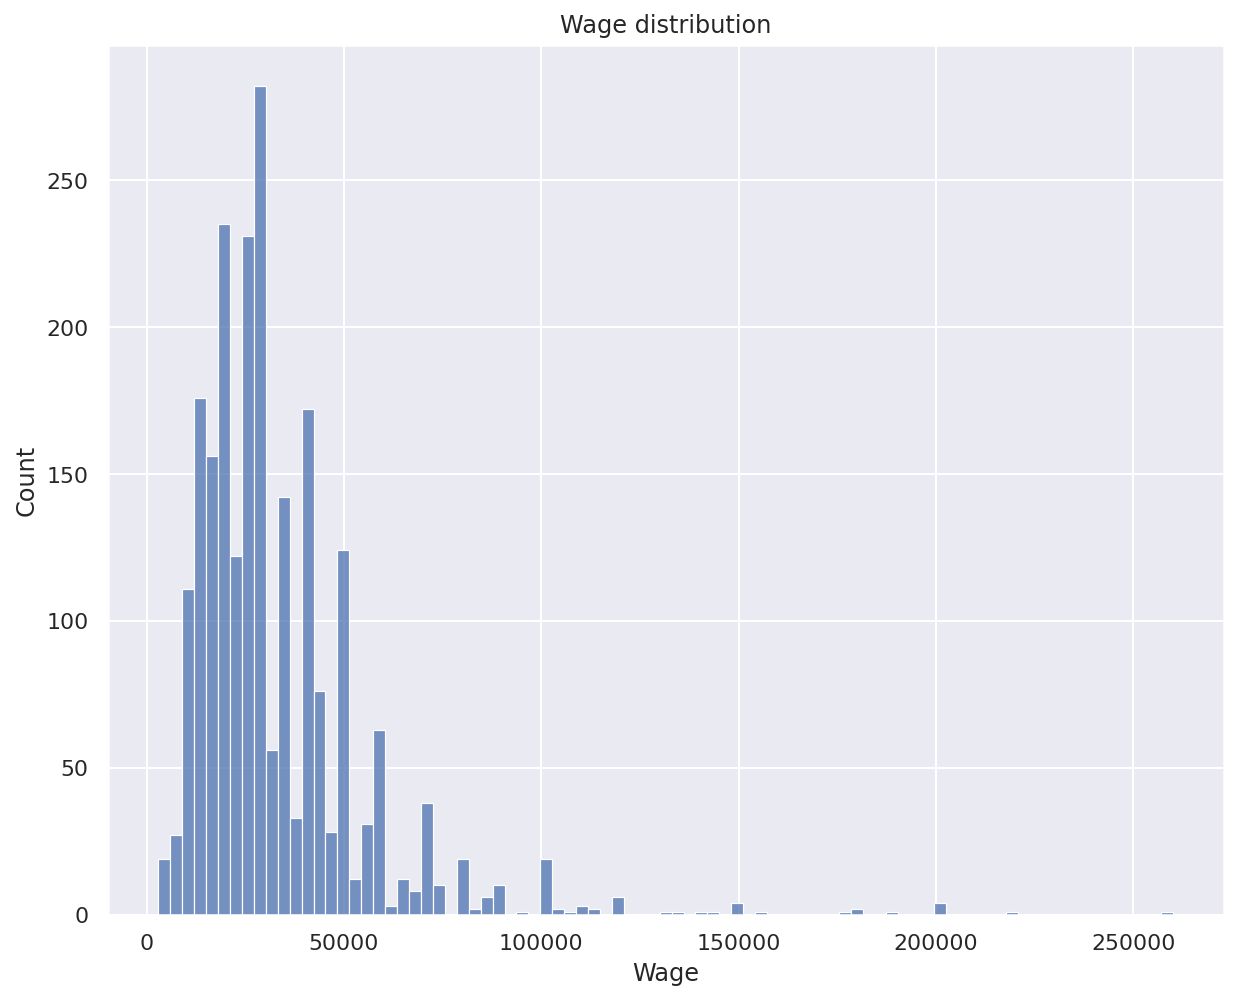

In [51]:
sns.set(rc={'figure.figsize':(10,8)})

sns.histplot(df_tmp["wage"])
plt.xlabel("Wage")
plt.title("Wage distribution")

Text(0.5, 1.0, 'Wage distribution with job satisfaction index')

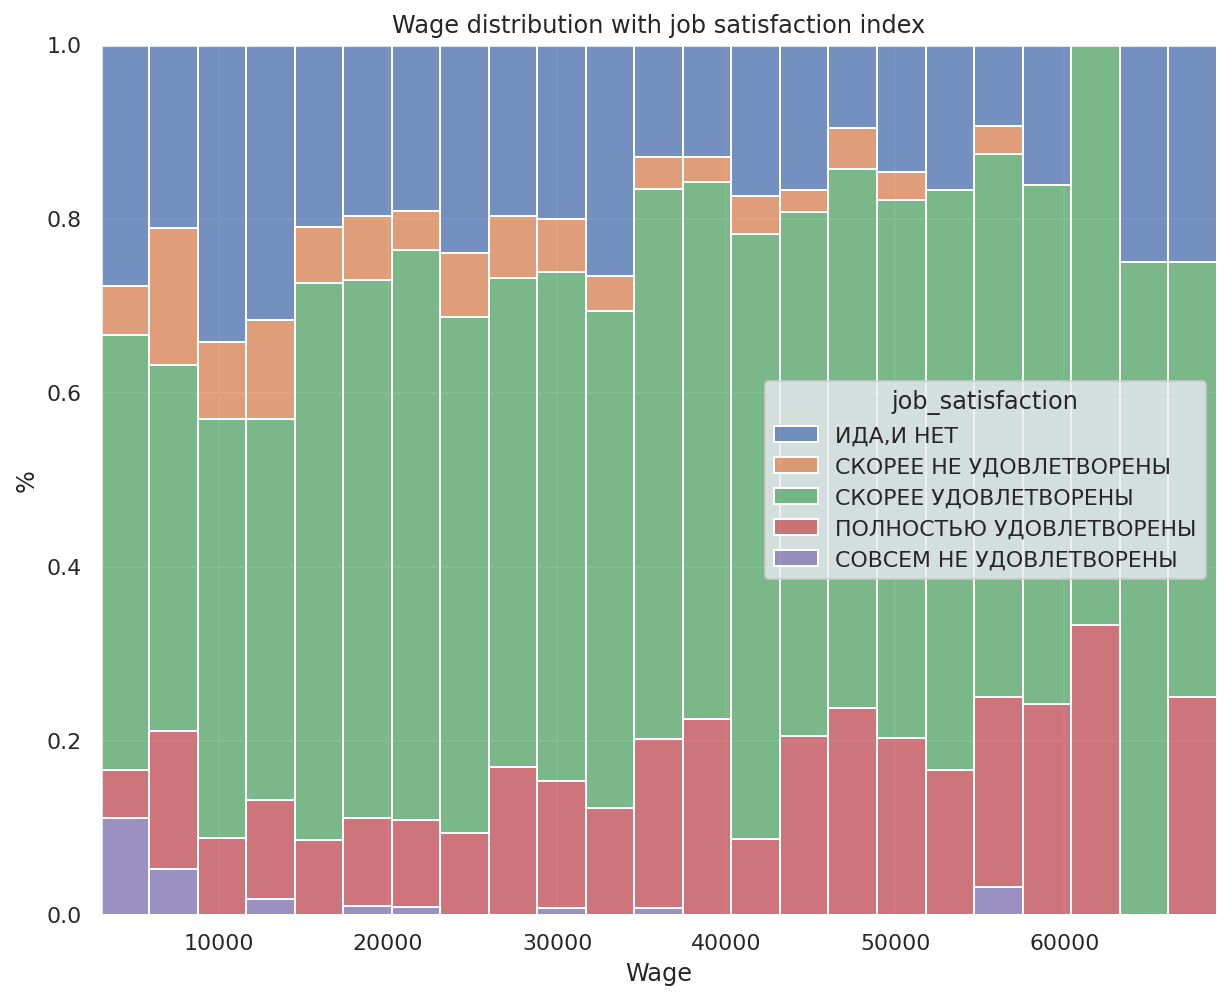

In [52]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]
di = {1: "ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ",
      2: "СКОРЕЕ УДОВЛЕТВОРЕНЫ",
      3: "ИДА,И НЕТ",
      4: "СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ",
      5: "СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ"}
df_tmp_1 = df_tmp_1.replace({"job_satisfaction": di})

sns.histplot(data=df_tmp_1, x="wage", hue="job_satisfaction", multiple="fill")
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with job satisfaction index")

Text(0.5, 1.0, 'Wage distribution with education')

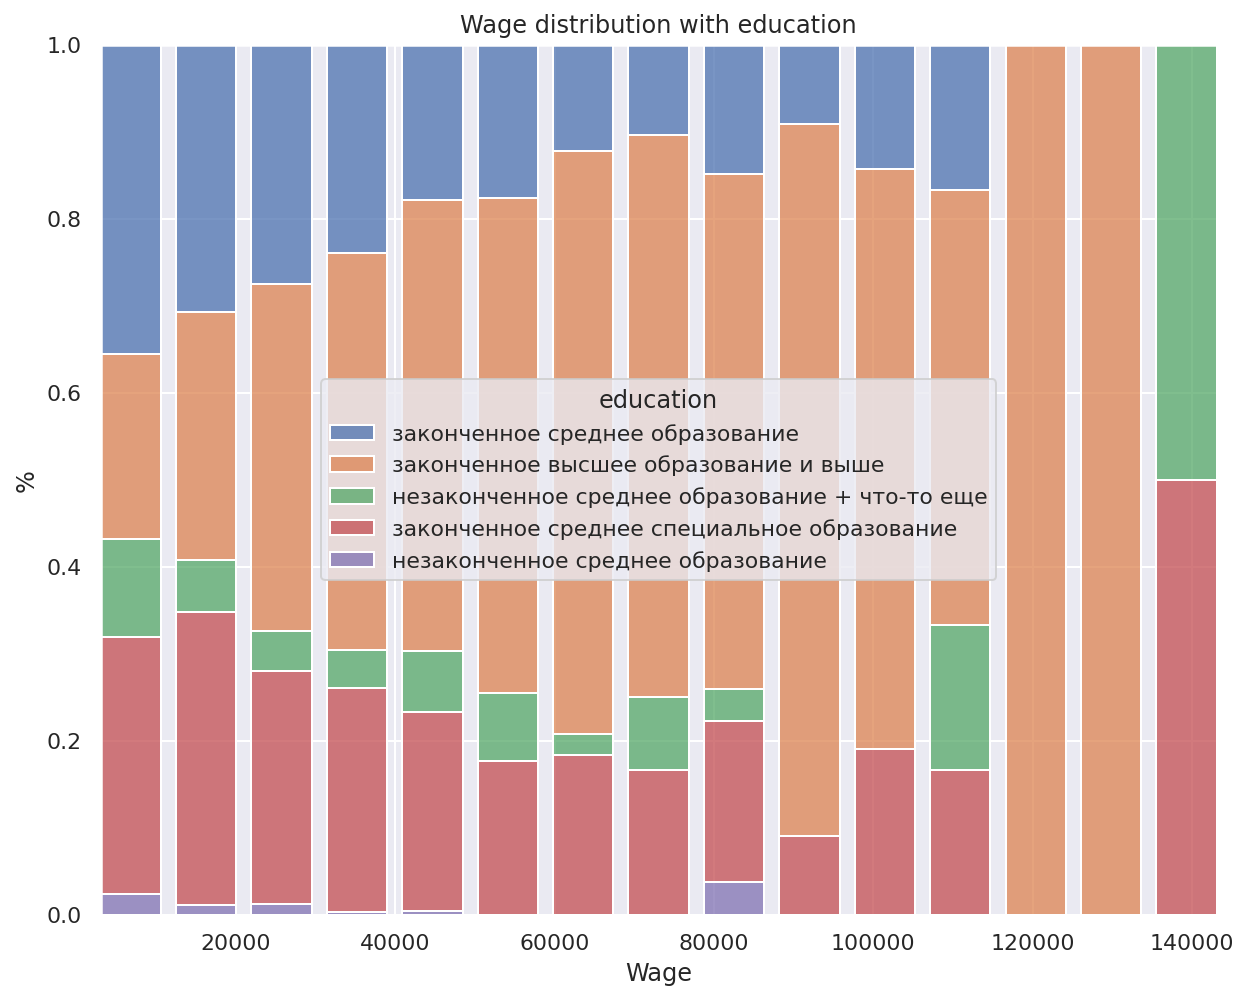

In [53]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

di = {1: "0-6 классов",
      2: "незаконченное среднее образование",
      3: "незаконченное среднее образование + что-то еще",
      4: "законченное среднее образование",
      5: "законченное среднее специальное образование",
      6: "законченное высшее образование и выше"}
df_tmp_1 = df_tmp_1.replace({"education": di})

sns.histplot(data=df_tmp_1, x="wage", hue="education", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with education")

Text(0.5, 1.0, 'Wage distribution with education')

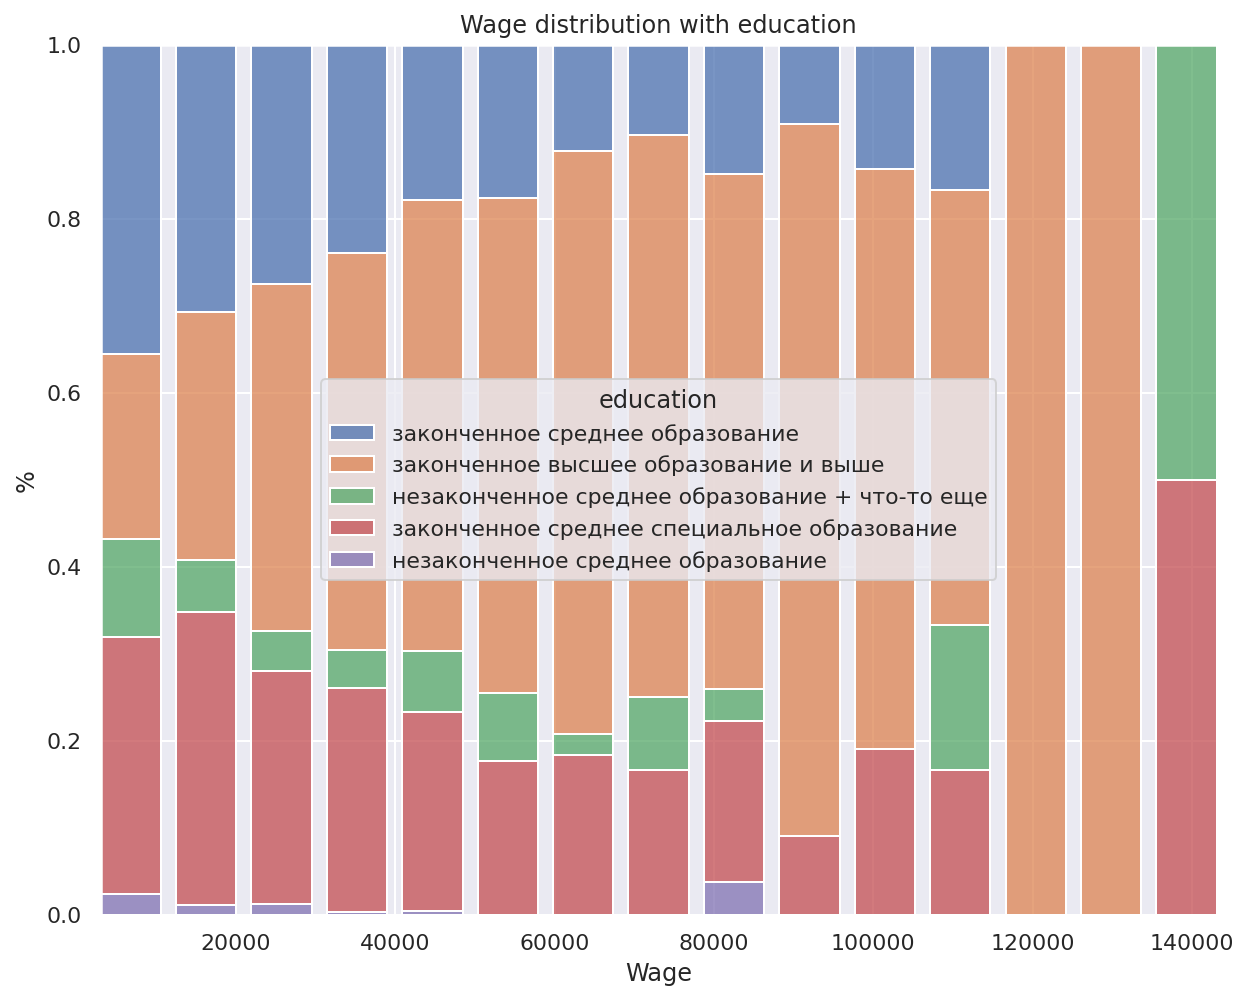

In [54]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

di = {1: "0-6 классов",
      2: "незаконченное среднее образование",
      3: "незаконченное среднее образование + что-то еще",
      4: "законченное среднее образование",
      5: "законченное среднее специальное образование",
      6: "законченное высшее образование и выше"}
df_tmp_1 = df_tmp_1.replace({"education": di})

sns.histplot(data=df_tmp_1, x="wage", hue="education", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with education")

In [55]:
df_tmp_ = df_tmp.copy()

In [56]:
conversion_education = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
df_tmp_['education'] = df_tmp['education'].replace(conversion_education)

conversion_foregin_lan = {1: 0, 2: 1}
df_tmp['foreigin_lan'] = df_tmp['foreigin_lan'].replace(conversion_foregin_lan)

conversion_alc = {1: 0, 2: 1}
df_tmp['alc'] = df_tmp['alc'].replace(conversion_alc)

#conversion_married = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
#df_tmp['married'] = df_tmp['married'].replace(conversion_married)

#conversion_internet_user = {1: 1, 2: 0}
#df_tmp['internet_user'] = df_tmp['internet_user'].replace(conversion_internet_user)

conversion_job = {k: 0 for i, k in enumerate(df_tmp['job'])}
conversion_job[27] = 1
conversion_job[31] = 1
conversion_job[15] = 1
conversion_job[4] = 1
df_tmp_['job'] = df_tmp['job'].replace(conversion_job)


conversion_psu = {k: 0 for i, k in enumerate(df_tmp['psu'])}
conversion_psu[2] = 1
df_tmp['psu'] = df_tmp['psu'].replace(conversion_psu)

conversion_supervisor = {1: 1, 2: 0}
df_tmp['supervisor'] = df_tmp['supervisor'].replace(conversion_supervisor)

conversion_ok= {1: 1, 2: 0}
df_tmp['ok'] = df_tmp['ok'].replace(conversion_ok)

conversion_vk= {1: 1, 2: 0}
df_tmp['vk'] = df_tmp['vk'].replace(conversion_vk)

conversion_facebook= {1: 1, 2: 0}
df_tmp['facebook'] = df_tmp['facebook'].replace(conversion_facebook)

conversion_twitter= {1: 1, 2: 0}
df_tmp['twitter'] = df_tmp['twitter'].replace(conversion_twitter)

conversion_male= {1: 1, 2: 0}
df_tmp['male'] = df_tmp['male'].replace(conversion_male)

In [57]:
df_tmp

,wage,job_satisfaction,job,education,foreigin_lan,alc,age,job_experience,psu,supervisor,work_time,ok,vk,facebook,twitter,male
4,30000.0,3.0,7.0,4.0,1,1,52.0,32.0,0,0.0,8.0,0,1,0,0,0
11,90000.0,2.0,10.0,6.0,0,0,44.0,21.0,0,0.0,9.0,0,1,0,0,0
12,29500.0,4.0,17.0,4.0,1,0,57.0,40.0,0,0.0,24.0,0,1,1,0,0
13,38000.0,2.0,17.0,4.0,1,0,51.0,28.0,0,0.0,24.0,0,0,0,0,1
14,11000.0,2.0,6.0,3.0,1,0,39.0,15.0,0,0.0,12.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103,40000.0,2.0,28.0,6.0,1,1,27.0,2.0,0,0.0,12.0,1,1,1,1,0
12104,46000.0,1.0,13.0,6.0,1,0,26.0,6.0,0,0.0,24.0,0,1,0,0,0
12105,68000.0,2.0,13.0,6.0,0,0,48.0,28.0,0,1.0,8.0,0,1,0,0,0
12115,27000.0,2.0,11.0,6.0,1,0,59.0,36.0,0,0.0,5.0,0,1,0,0,0


In [34]:
model = smf.ols('wage ~ job_experience + age + male + education + job_satisfaction + alc + supervisor + work_time', data=df_tmp_)
fit_simple_2 = model.fit()
fit_simple_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     57.94
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           3.66e-86
Time:                        16:44:29   Log-Likelihood:                -25621.
No. Observations:                2257   AIC:                         5.126e+04
Df Residuals:                    2248   BIC:                         5.131e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.892e+04   3580.396     19.248      0.000    6.19e+04    7.59e+04
male[T.2.0]      -9341.1154    901.256    -10.365      0.000   -1.11e+04   -7573.735
alc[T.2.0]       -3783.5937    920.559     -4.110      0.000   -5588.829   -1978.359
job_experience     196.5581     91.404      2.150      0.032      17.313     375.803
age               -282.1615     93.802     -3.008      0.003    -466.108     -98.215
education         9314.5205    918.990     10.136      0.000    7512.362    1.11e+04
job_satisfaction -3465.3418    576.428     -6.012      0.000   -4595.728   -2334.956
supervisor       -1.114e+04   1105.871    -10.075      0.000   -1.33e+04   -8973.204
work_time          288.8444    111.772      2.584      0.010      69.658     508.031
==============================================================================
Omnibus:                     1680.841   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42248.487
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      23.165   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# simple model

df_tmp["wage_log"] = np.log(df_tmp["wage"])

conversion_education = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
df_tmp['education'] = df_tmp['education'].replace(conversion_education)

model = smf.ols('wage ~ job_experience + age + male + education + job_satisfaction + job + alc + supervisor + work_time', data=df_tmp)
fit = model.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           3.87e-74
Time:                        16:45:34   Log-Likelihood:                -25604.
No. Observations:                2257   AIC:                         5.128e+04
Df Residuals:                    2221   BIC:                         5.149e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.841e+04   3559.064     10.793      0.000    3.14e+04    4.54e+04
job[T.2.0]        3207.3768   3521.028      0.911      0.362   -3697.475    1.01e+04
job[T.3.0]        5237.8314   3469.000      1.510      0.131   -1564.992     1.2e+04
job[T.4.0]        2.016e+04   3246.740      6.208      0.000    1.38e+04    2.65e+04
job[T.5.0]        5535.3172   2831.876      1.955      0.051     -18.084    1.11e+04
job[T.6.0]        7434.3108   2540.318      2.927      0.003    2452.664    1.24e+04
job[T.7.0]        4765.8182   2316.847      2.057      0.040     222.405    9309.231
job[T.8.0]        -254.2364   3424.258     -0.074      0.941   -6969.317    6460.845
job[T.9.0]        4785.6482   3248.690      1.473      0.141   -1585.140    1.12e+04
job[T.10.0]        145.6205   2289.286      0.064      0.949   -4343.745    4634.986
job[T.11.0]       2913.1081   3081.454      0.945      0.345   -3129.724    8955.940
job[T.12.0]       5745.9118   2411.293      2.383      0.017    1017.288    1.05e+04
job[T.13.0]       3199.8250   2592.979      1.234      0.217   -1885.092    8284.742
job[T.14.0]       1318.0989   2026.241      0.651      0.515   -2655.426    5291.624
job[T.15.0]       1.603e+04   3094.283      5.180      0.000    9960.509    2.21e+04
job[T.16.0]       1.275e+04   3771.645      3.380      0.001    5351.537    2.01e+04
job[T.17.0]      -1577.9827   2944.763     -0.536      0.592   -7352.759    4196.794
job[T.18.0]       6805.8296   7531.886      0.904      0.366   -7964.446    2.16e+04
job[T.20.0]      -4133.4547   8025.614     -0.515      0.607   -1.99e+04    1.16e+04
job[T.21.0]       7774.4152   5810.521      1.338      0.181   -3620.207    1.92e+04
job[T.23.0]       1.026e+04   9402.649      1.091      0.275   -8180.101    2.87e+04
job[T.24.0]       1372.2978   9414.262      0.146      0.884   -1.71e+04    1.98e+04
job[T.25.0]      -1829.5868   5803.344     -0.315      0.753   -1.32e+04    9550.960
job[T.26.0]       1.311e+04   5068.697      2.587      0.010    3171.191    2.31e+04
job[T.27.0]       2.097e+04   5491.959      3.818      0.000    1.02e+04    3.17e+04
job[T.28.0]       8245.3536   1.47e+04      0.560      0.575   -2.06e+04    3.71e+04
job[T.29.0]      -7392.9131   1.21e+04     -0.613      0.540    -3.1e+04    1.63e+04
job[T.30.0]       9467.8256   5803.508      1.631      0.103   -1913.042    2.08e+04
job[T.31.0]       3.536e+04   8009.714      4.414      0.000    1.96e+04    5.11e+04
job_experience     154.6685     92.573      1.671      0.095     -26.869     336.206
age               -231.8131     94.313     -2.458      0.014    -416.763     -46.863
male              7476.1490    991.313      7.542      0.000    5532.151    9420.147
education         6.771e-10   1.93e-10      3.507      0.000    2.98e-10    1.06e-09
job_satisfaction -3931.

In [58]:
# simple model

df_tmp["wage_log"] = np.log(df_tmp["wage"])

model = smf.ols('wage ~ job_experience + age + male + education + job_satisfaction + job + alc + supervisor + work_time + psu + foreigin_lan', data=df_tmp)
fit_b = model.fit()
fit_b.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          6.20e-137
Time:                        16:54:06   Log-Likelihood:                -25440.
No. Observations:                2257   AIC:                         5.096e+04
Df Residuals:                    2215   BIC:                         5.120e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.821e+04   5447.544      5.178      0.000    1.75e+04    3.89e+04
education[T.3.0]  9160.3422   4534.284      2.020      0.043     268.450    1.81e+04
education[T.4.0]  6049.9982   4279.291      1.414      0.158   -2341.843    1.44e+04
education[T.5.0]  5641.1334   4289.773      1.315      0.189   -2771.263    1.41e+04
education[T.6.0]  1.226e+04   4301.087      2.849      0.004    3820.566    2.07e+04
job[T.2.0]        2324.0438   3281.326      0.708      0.479   -4110.753    8758.841
job[T.3.0]        3958.2075   3237.391      1.223      0.222   -2390.431    1.03e+04
job[T.4.0]        1.811e+04   3028.629      5.981      0.000    1.22e+04    2.41e+04
job[T.5.0]        6219.7487   2640.932      2.355      0.019    1040.786    1.14e+04
job[T.6.0]        5368.9189   2370.707      2.265      0.024     719.878       1e+04
job[T.7.0]        1644.2579   2166.440      0.759      0.448   -2604.207    5892.723
job[T.8.0]         -31.5936   3188.377     -0.010      0.992   -6284.114    6220.927
job[T.9.0]         644.9381   3056.327      0.211      0.833   -5348.629    6638.505
job[T.10.0]      -2740.0453   2159.646     -1.269      0.205   -6975.187    1495.097
job[T.11.0]      -3923.0919   2900.206     -1.353      0.176   -9610.498    1764.314
job[T.12.0]       3872.8212   2266.417      1.709      0.088    -571.704    8317.346
job[T.13.0]        103.4254   2437.828      0.042      0.966   -4677.242    4884.093
job[T.14.0]       -887.1210   1892.576     -0.469      0.639   -4598.531    2824.289
job[T.15.0]       7769.6387   2927.102      2.654      0.008    2029.487    1.35e+04
job[T.16.0]       1.026e+04   3535.846      2.902      0.004    3327.990    1.72e+04
job[T.17.0]      -3596.1731   2745.798     -1.310      0.190   -8980.781    1788.435
job[T.18.0]        588.2464   7031.617      0.084      0.933   -1.32e+04    1.44e+04
job[T.20.0]      -6254.5269   7477.789     -0.836      0.403   -2.09e+04    8409.684
job[T.21.0]        871.7251   5460.593      0.160      0.873   -9836.692    1.16e+04
job[T.23.0]       4099.0249   8773.905      0.467      0.640   -1.31e+04    2.13e+04
job[T.24.0]       2243.3890   8766.665      0.256      0.798   -1.49e+04    1.94e+04
job[T.25.0]      -6530.9636   5412.497     -1.207      0.228   -1.71e+04    4083.136
job[T.26.0]       9628.5338   4722.990      2.039      0.042     366.582    1.89e+04
job[T.27.0]       1.349e+04   5171.973      2.608      0.009    3344.916    2.36e+04
job[T.28.0]       3578.8211   1.37e+04      0.261      0.794   -2.33e+04    3.05e+04
job[T.29.0]      -5116.3297   1.12e+04     -0.456      0.649   -2.71e+04    1.69e+04
job[T.30.0]         63.7195   5431.516      0.012      0.991   -1.06e+04    1.07e+04
job[T.31.0]       2.866e+04   7477.849      3.833      0.000     1.4e+04    4.33e+04
job_experience      90.

In [70]:
# simple model

df_tmp["wage_log"] = np.log(df_tmp["wage"])

model = smf.ols('wage ~ job_experience + age + male + education + job_satisfaction + job + alc + supervisor + work_time + psu + foreigin_lan + ok + vk + facebook + twitter', data=df_tmp)
fit_soc = model.fit()
fit_soc.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          2.53e-138
Time:                        17:40:18   Log-Likelihood:                -25430.
No. Observations:                2257   AIC:                         5.095e+04
Df Residuals:                    2211   BIC:                         5.121e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.898e+04   5562.385      5.210      0.000    1.81e+04    3.99e+04
education[T.3.0]  9630.1979   4521.395      2.130      0.033     763.572    1.85e+04
education[T.4.0]  6243.1853   4265.497      1.464      0.143   -2121.615    1.46e+04
education[T.5.0]  5773.1772   4276.014      1.350      0.177   -2612.247    1.42e+04
education[T.6.0]  1.223e+04   4287.034      2.853      0.004    3821.945    2.06e+04
job[T.2.0]        2141.4631   3276.244      0.654      0.513   -4283.375    8566.301
job[T.3.0]        4356.7165   3237.346      1.346      0.179   -1991.841    1.07e+04
job[T.4.0]        1.816e+04   3018.948      6.017      0.000    1.22e+04    2.41e+04
job[T.5.0]        6172.6219   2637.767      2.340      0.019     999.862    1.13e+04
job[T.6.0]        5296.9149   2366.998      2.238      0.025     655.143    9938.687
job[T.7.0]        1696.1107   2161.457      0.785      0.433   -2542.587    5934.808
job[T.8.0]         221.4047   3178.988      0.070      0.944   -6012.710    6455.520
job[T.9.0]         569.9981   3052.237      0.187      0.852   -5415.553    6555.549
job[T.10.0]      -2633.4404   2159.820     -1.219      0.223   -6868.927    1602.047
job[T.11.0]      -3861.4456   2895.665     -1.334      0.182   -9539.953    1817.061
job[T.12.0]       3756.3536   2264.445      1.659      0.097    -684.307    8197.014
job[T.13.0]        475.4803   2434.353      0.195      0.845   -4298.377    5249.337
job[T.14.0]       -689.3268   1894.832     -0.364      0.716   -4405.164    3026.510
job[T.15.0]       7747.0454   2928.452      2.645      0.008    2004.241    1.35e+04
job[T.16.0]       9551.8240   3529.549      2.706      0.007    2630.246    1.65e+04
job[T.17.0]      -3832.1823   2741.418     -1.398      0.162   -9208.207    1543.842
job[T.18.0]       1319.6805   7022.076      0.188      0.851   -1.25e+04    1.51e+04
job[T.20.0]      -5388.1928   7460.317     -0.722      0.470      -2e+04    9241.770
job[T.21.0]        -82.7151   5458.961     -0.015      0.988   -1.08e+04    1.06e+04
job[T.23.0]       3385.9469   8750.328      0.387      0.699   -1.38e+04    2.05e+04
job[T.24.0]       3656.3086   8751.206      0.418      0.676   -1.35e+04    2.08e+04
job[T.25.0]      -6691.4473   5398.171     -1.240      0.215   -1.73e+04    3894.569
job[T.26.0]       9816.0880   4712.006      2.083      0.037     575.667    1.91e+04
job[T.27.0]       1.272e+04   5160.907      2.464      0.014    2594.762    2.28e+04
job[T.28.0]       2344.3288   1.37e+04      0.171      0.864   -2.45e+04    2.92e+04
job[T.29.0]      -5339.1487   1.13e+04     -0.475      0.635   -2.74e+04    1.67e+04
job[T.30.0]       -316.8095   5420.560     -0.058      0.953   -1.09e+04    1.03e+04
job[T.31.0]       2.762e+04   7458.891      3.704      0.000     1.3e+04    4.23e+04
job_experience     102.

In [69]:
# simple model

df_tmp["wage_log"] = np.log(df_tmp["wage"])

model = smf.ols('wage_log ~ job_experience + age + male + education + job_satisfaction + job + alc + supervisor + work_time + psu + foreigin_lan + ok + vk + facebook + twitter', data=df_tmp)
fit_soc = model.fit()
fit_soc.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wage_log   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     27.56
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          6.42e-179
Time:                        17:40:14   Log-Likelihood:                -1443.8
No. Observations:                2257   AIC:                             2980.
Df Residuals:                    2211   BIC:                             3243.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.2134      0.135     75.737      0.000       9.949      10.478
education[T.3.0]     0.2701      0.110      2.464      0.014       0.055       0.485
education[T.4.0]     0.2054      0.103      1.987      0.047       0.003       0.408
education[T.5.0]     0.2162      0.104      2.085      0.037       0.013       0.419
education[T.6.0]     0.4071      0.104      3.917      0.000       0.203       0.611
job[T.2.0]           0.0547      0.079      0.689      0.491      -0.101       0.210
job[T.3.0]           0.1550      0.078      1.975      0.048       0.001       0.309
job[T.4.0]           0.3074      0.073      4.200      0.000       0.164       0.451
job[T.5.0]           0.1084      0.064      1.695      0.090      -0.017       0.234
job[T.6.0]           0.1188      0.057      2.070      0.039       0.006       0.231
job[T.7.0]           0.0286      0.052      0.546      0.585      -0.074       0.131
job[T.8.0]          -0.0213      0.077     -0.276      0.783      -0.172       0.130
job[T.9.0]          -0.0953      0.074     -1.288      0.198      -0.240       0.050
job[T.10.0]         -0.1570      0.052     -2.998      0.003      -0.260      -0.054
job[T.11.0]         -0.2116      0.070     -3.014      0.003      -0.349      -0.074
job[T.12.0]          0.0359      0.055      0.654      0.513      -0.072       0.144
job[T.13.0]          0.0104      0.059      0.176      0.860      -0.105       0.126
job[T.14.0]         -0.0434      0.046     -0.944      0.345      -0.133       0.047
job[T.15.0]          0.0920      0.071      1.295      0.195      -0.047       0.231
job[T.16.0]          0.2541      0.086      2.969      0.003       0.086       0.422
job[T.17.0]         -0.1278      0.066     -1.923      0.055      -0.258       0.003
job[T.18.0]          0.0251      0.170      0.148      0.883      -0.309       0.359
job[T.20.0]         -0.4916      0.181     -2.718      0.007      -0.846      -0.137
job[T.21.0]         -0.0809      0.132     -0.611      0.541      -0.340       0.179
job[T.23.0]          0.1322      0.212      0.623      0.533      -0.284       0.548
job[T.24.0]          0.0518      0.212      0.244      0.807      -0.364       0.468
job[T.25.0]         -0.2762      0.131     -2.110      0.035      -0.533      -0.020
job[T.26.0]          0.1320      0.114      1.156      0.248      -0.092       0.356
job[T.27.0]          0.2196      0.125      1.755      0.079      -0.026       0.465
job[T.28.0]          0.1429      0.332      0.430      0.667      -0.508       0.794
job[T.29.0]         -0.1761      0.273     -0.645      0.519      -0.711       0.359
job[T.30.0]         -0.0711      0.131     -0.541      0.588      -0.329       0.187
job[T.31.0]          0.3127      0.181      1.729      0.084      -0.042       0.667
job_experience       0.

In [63]:
fit_soc.compare_f_test(fit_b)

(4.938305283682353, 0.0005789982447751468, 4.0)

In [68]:
# simple model

df_tmp["wage_log"] = np.log(df_tmp["wage"])

model = smf.ols('wage ~ job_experience + age + male + education + job_satisfaction', data=df_tmp_)
fit_simple = model.fit()
fit_simple.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     63.17
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           8.08e-62
Time:                        17:40:07   Log-Likelihood:                -25685.
No. Observations:                2257   AIC:                         5.138e+04
Df Residuals:                    2251   BIC:                         5.142e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.077e+04   2853.234     17.794      0.000    4.52e+04    5.64e+04
male[T.2.0]      -1.051e+04    914.631    -11.490      0.000   -1.23e+04   -8715.299
job_experience     240.8539     93.843      2.567      0.010      56.826     424.882
age               -294.7039     96.381     -3.058      0.002    -483.709    -105.699
education         1.055e+04    920.497     11.457      0.000    8740.748    1.24e+04
job_satisfaction -3728.7912    589.159     -6.329      0.000   -4884.142   -2573.440
==============================================================================
Omnibus:                     1687.751   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41293.709
Skew:                           3.297   Prob(JB):                         0.00
Kurtosis:                      22.890   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [728]:
#df_tmp["income"] = np.log(df_tmp["income"])


model = smf.ols('income ~  work_time + job_experience + age + education + foregin_lan + alc + job_satisfaction + job + psu + supervisor + ok + male', data=df_tmp)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     64.86
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.00e-129
Time:                        16:41:28   Log-Likelihood:                -19242.
No. Observations:                1707   AIC:                         3.851e+04
Df Residuals:                    1694   BIC:                         3.858e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.316e+04   3573.668     12.078      0.000    3.62e+04    5.02e+04
work_time          339.9624    115.080      2.954      0.003     114.248     565.677
job_experience      79.8329     92.114      0.867      0.386    -100.837     260.502
age               -228.8965     98.931     -2.314      0.021    -422.936     -34.857
education         5259.2039   1042.661      5.044      0.000    3214.164    7304.244
foregin_lan      -5669.6089   1223.155     -4.635      0.000   -8068.663   -3270.555
alc              -2705.1901    982.589     -2.753      0.006   -4632.406    -777.974
job_satisfaction -3587.6727    614.893     -5.835      0.000   -4793.702   -2381.644
job               1.271e+04   1944.914      6.535      0.000    8894.726    1.65e+04
psu                2.15e+04   1663.414     12.923      0.000    1.82e+04    2.48e+04
supervisor        1.151e+04   1149.230     10.015      0.000    9255.366    1.38e+04
ok               -4422.8379    988.789     -4.473      0.000   -6362.215   -2483.461
male              9516.7471    983.708      9.674      0.000    7587.337    1.14e+04
==============================================================================
Omnibus:                     1170.030   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23391.274
Skew:                           2.940   Prob(JB):                         0.00
Kurtosis:                      20.155   Cond. No.                         404.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
df_pred = df_tmp

df_pred = pd.DataFrame({
   "job_experience": [2],
   "age": [22],
   "male": 1,
   "education": 1,
   "job_satisfaction": 2,
   "job": [27],
   "alc": [1],
   "supervisor": [0],
    "psu": [1],
   "work_time": [8],
    "foreigin_lan": [0],
    "ok": [0],
    "vk": [1],
    "facebook": [0],
    "twitter": [0]})

for col in ["job"]:
    df_pred[col] = pd.Categorical(df_pred[col])

,wage,job_satisfaction,job,education,foreigin_lan,alc,age,job_experience,psu,supervisor,work_time,ok,vk,facebook,twitter,male,wage_log
4,30000,3,7,4,1,1,52,32,0,0,8,0,1,0,0,0,10.309


,wage,job_satisfaction,job,education,foreigin_lan,alc,age,job_experience,psu,supervisor,work_time,ok,vk,facebook,twitter,male,wage_log
4,30000.0,3.0,7.0,4.0,1,1,52.0,32.0,0,0.0,8.0,0,1,0,0,0,10.308953
11,90000.0,2.0,10.0,6.0,0,0,44.0,21.0,0,0.0,9.0,0,1,0,0,0,11.407565
12,29500.0,4.0,17.0,4.0,1,0,57.0,40.0,0,0.0,24.0,0,1,1,0,0,10.292146
13,38000.0,2.0,17.0,4.0,1,0,51.0,28.0,0,0.0,24.0,0,0,0,0,1,10.545341
14,11000.0,2.0,6.0,3.0,1,0,39.0,15.0,0,0.0,12.0,0,0,0,0,1,9.305651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103,40000.0,2.0,28.0,6.0,1,1,27.0,2.0,0,0.0,12.0,1,1,1,1,0,10.596635
12104,46000.0,1.0,13.0,6.0,1,0,26.0,6.0,0,0.0,24.0,0,1,0,0,0,10.736397
12105,68000.0,2.0,13.0,6.0,0,0,48.0,28.0,0,1.0,8.0,0,1,0,0,0,11.127263
12115,27000.0,2.0,11.0,6.0,1,0,59.0,36.0,0,0.0,5.0,0,1,0,0,0,10.203592


In [84]:
df_pred

,wage,job_satisfaction,job,education,foreigin_lan,alc,age,job_experience,psu,supervisor,work_time,ok,vk,facebook,twitter,male,wage_log
4,30000,3,7,4,1,1,52,32,0,0,8,0,1,0,0,0,10.309


In [90]:
df_tmp__ = df_tmp.copy()

In [91]:
df_tmp__.loc[4,'wage'] = 1

In [100]:
df_tmp__.loc[4,'job_satisfaction'] = 1
df_tmp__.loc[4,'job'] = 27
df_tmp__.loc[4,'alc'] = 0
df_tmp__.loc[4,'psu'] = 1
df_tmp__.loc[4,'work_time'] = 8
df_tmp__.loc[4,'foreigin_lan'] = 0
df_tmp__.loc[4,'ok'] = 1
df_tmp__.loc[4,'vk'] = 1
df_tmp__.loc[4,'twitter'] = 0
df_tmp__.loc[4,'facebook'] = 0

In [101]:
fit_soc.predict(df_tmp__)

4        59808.059138
11       30506.360395
12       18965.516501
13       32025.074412
14       41158.203640
             ...     
12103    30520.209960
12104    38918.126745
12105    44574.600820
12115    24544.026875
12119    12149.621398
Length: 2257, dtype: float64

In [102]:
fit_soc.get_prediction(df_tmp__).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,59808.059138,5314.388905,49386.343193,70229.775083,20894.428676,98721.689601
1,30506.360395,1657.723674,27255.502101,33757.218688,-7126.425208,68139.145997
2,18965.516501,3280.900453,12531.547672,25399.485331,-19074.652103,57005.685106
3,32025.074412,2780.335221,26572.732775,37477.416049,-5861.420568,69911.569392
4,41158.203640,2426.286695,36400.164439,45916.242841,3365.381443,78951.025836
...,...,...,...,...,...,...
2252,30520.209960,13579.134336,3891.018276,57149.401645,-15466.443781,76506.863702
2253,38918.126745,2542.266342,33932.647108,43903.606383,1095.997247,76740.256243
2254,44574.600820,2273.926587,40115.345505,49033.856135,6818.231417,82330.970223
2255,24544.026875,2655.571564,19336.351448,29751.702302,-13308.031932,62396.085682


In [656]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [ ]:
d = {"yj10":   "income",
    "yj1.1.1": "job_satisfaction",
    "y_diplom": "education",
    "yj4.1": "job",
    "yj260": "foregin_lan",
    "ym80": "alc",
    "yj322": "married",
    "yj123": "internet_user",
    "yj72.172": "kids",
    "y_age": "age",
    "yj161.3y": "job_experience", 
    "yj6": "supervisor",
    "yj6.1a": "work_time",
    "yj401.1a": "ok",
    "yj401.2a": "vk",
    "yj401.3a": "facebook",
    "yj401.5a": "twitter"}